In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
def compute_pca(X):
    mu = np.mean(X, axis=0)
    X_c = X - mu
    XX_T = np.cov(X_c, rowvar=False)
    eigval, eigvec = np.linalg.eigh(XX_T)
    sorted_indices = np.argsort(eigval)[::-1]
    eigval = eigval[sorted_indices]
    eigvec = eigvec[:, sorted_indices]
    proxy = X_c.dot(eigvec)
    var_ratio = eigval / np.sum(eigval)
    return eigvec, proxy, var_ratio

In [36]:
data = pd.read_csv('train.csv')
L = data['label']
features = data.drop('label', axis=1)
sampled_data = pd.DataFrame()
np.random.seed(24)
for i in range(10):
    indices = L.index[L == i]
    sampled_indices = np.random.choice(indices, size=100, replace=False)
    sampled_data = pd.concat([sampled_data, features.loc[sampled_indices]])
sampled_data.reset_index(drop=True, inplace=True)

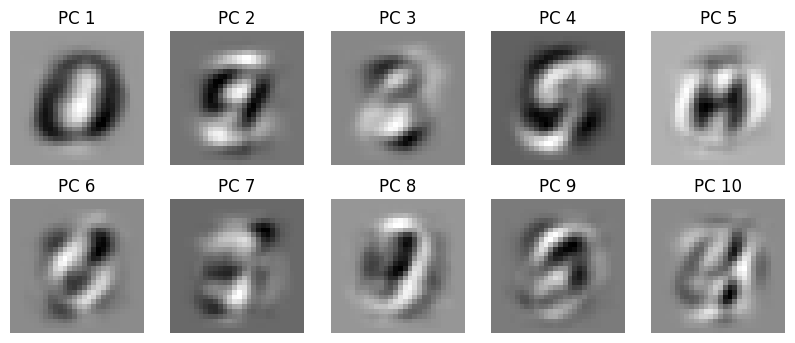

In [37]:
X = sampled_data.to_numpy()
mu = np.mean(X, axis=0)
X_c = X - mu
XX_T = np.cov(X_c, rowvar=False)
eigval, eigvec = np.linalg.eigh(XX_T)
sorted_indices = np.argsort(eigval)[::-1]
eigval = eigval[sorted_indices]
eigvec = eigvec[:, sorted_indices]
proxy = X_c.dot(eigvec)
var_ratio = eigval / np.sum(eigval)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    r = i // 5 
    c = i % 5
    pc = eigvec[:, i].reshape   (28, 28)
    axes[r, c].imshow(pc, cmap='gray')
    axes[r, c].set_title(f'PC {i+1}')
    axes[r, c].axis('off')
plt.show()

In [38]:
print("Explained Variance Ratio:")
for i in range(10):
    print(f"PC {i+1}: {var_ratio[i]*100:.3f}%")

Explained Variance Ratio:
PC 1: 10.038%
PC 2: 7.239%
PC 3: 6.260%
PC 4: 5.250%
PC 5: 4.667%
PC 6: 4.508%
PC 7: 3.545%
PC 8: 2.846%
PC 9: 2.767%
PC 10: 2.452%


In [57]:
req_var = 0
d = 1
while(req_var < 95) :
    req_var += var_ratio[d-1]*100
    d+=1

print(d, req_var)
selected_pcs = eigvec[:, :d]

132 95.00855069238898


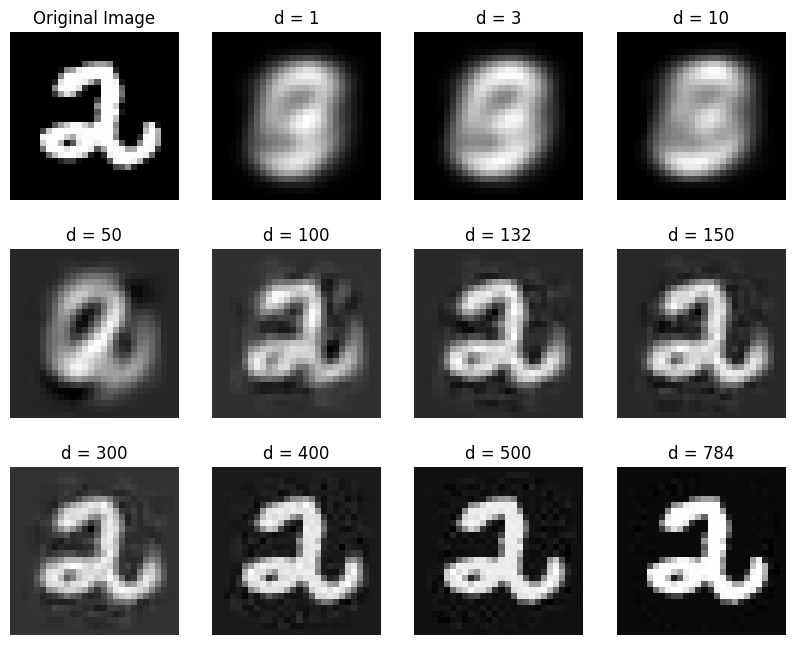

In [85]:
comp_dict = {}
# idx = np.random.choice(1000,1)
idx = 410 # random
disp_pcs = [0,1,3,10,50,100,150,300,400,500,784]
disp_pcs.append(d)
disp_pcs.sort()
for i in range(0,11):
    sel_pcs = eigvec[:,:disp_pcs[i]]
    og_data = features.loc[idx].to_numpy()
    label_proxy = og_data - mu
    rec_data = label_proxy.dot(sel_pcs)
    rec_data = rec_data.dot(sel_pcs.T) + mu
    comp_dict[i] = rec_data.reshape(-1, 28, 28)


fig, axes = plt.subplots(3, 4, figsize=(10, 8))
for i in range(3):
    for j in range(4):
        if i == 0 and j == 0 :
            axes[i,j].imshow(og_data.reshape(-1,28,28)[0],cmap='gray')
            axes[i,j].set_title('Original Image')
            axes[i,j].axis('off')
        else :
            axes[i,j].imshow(comp_dict[4*i+j-1][0],cmap='gray')
            axes[i,j].set_title(f'd = {disp_pcs[4*i + j]}')
            axes[i,j].axis('off')
plt.show()

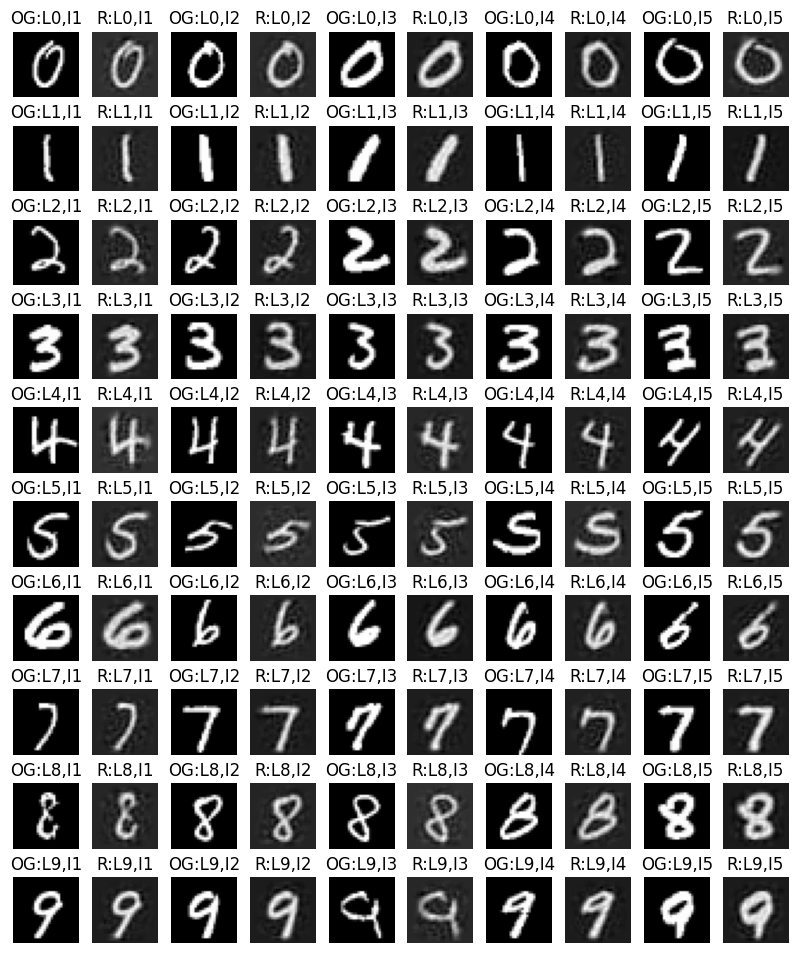

In [82]:
rec_dict = {}
og_dict = {}

for i in range(10):
    label_idx = L.index[L == i]
    smp_idx = np.random.choice(label_idx, size=5, replace=False)
    og_data = features.loc[smp_idx].to_numpy()
    label_proxy = og_data - mu
    rec_data = label_proxy.dot(selected_pcs)
    rec_data = rec_data.dot(selected_pcs.T) + mu
    rec_dict[i] = rec_data.reshape(-1, 28, 28)
    og_dict[i] = og_data.reshape(-1, 28, 28)


# Visualize the original and reconstructed images for each label
fig, axes = plt.subplots(10, 10, figsize=(10, 12))
for i in range(10):
    for j in range(5):
        axes[i, 2*j].imshow(og_dict[i][j], cmap='gray')
        axes[i, 2*j].set_title(f'OG:L{i},I{j+1}')
        axes[i, 2*j].axis('off')
        axes[i, 2*j+1].imshow(rec_dict[i][j], cmap='gray')
        axes[i, 2*j+1].set_title(f'R:L{i},I{j+1}')
        axes[i, 2*j+1].axis('off')
plt.show()